# Setup

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# Cleaning


In [2]:
csv_file_path = 'cleaned_golf_rolling_averages.csv'

df = pd.read_csv(csv_file_path, low_memory=False)


# drop columns we definitely don't need
cols_to_drop= ["bet_type", "tie_rule", "open_time", "close_time",
              "p1_outcome_text", "p2_outcome_text", "p3_outcome_text",
              "book", "event_completed", "event_name", "odds",

             'p1_player_name', 'p2_player_name', 'p3_player_name',

             'dg_id_p1', 'fin_text_p1', 'fin_text_p2', 'fin_text_p3',
             'course_name_p1', 'teetime_p2', 'teetime_p3', 'wx_teetime',
             'wx_datetime_hour',
             'wx_date_from_close', 'wx_conditions', 'wx_icon', 'wx_datetimeEpoch',
             'tour_p1', 'season']

df = df.drop(columns=cols_to_drop, errors='ignore')
# rename columns we'd like to keep
df = df.rename(columns={'teetime_p1':'teetime'})
if 'teetime' in df.columns:
    df = df.drop(columns=['teetime'])



# preciptype can either only be nan or 'rain'
if 'wx_preciptype' in df.columns:
    df['wx_preciptype'] = df['wx_preciptype'].fillna(0)
    df['wx_preciptype'] = df['wx_preciptype'].apply(lambda x: 1 if x != 0 else x)



# Create one outcome column
if 'outcome' not in df.columns:
    raise ValueError("DataFrame must not already have an 'outcome' column")

X = df.select_dtypes(include=["number"]).drop(columns=["outcome"])
y = df["outcome"]

# drop any rows where the target is NaN
mask = y.notna()
X = X[mask]
y = y[mask]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0,
    stratify=y
)

# impute NaNs in features with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled  = scaler.transform(X_test_imp)

# Logistic Regression

In [3]:
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="multinomial",
    solver="lbfgs"
)

log_reg.fit(X_train_scaled, y_train)

acc = log_reg.score(X_test_scaled, y_test)
print("\nLogistic regression accuracy:", acc)

y_pred = log_reg.predict(X_test_scaled)

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

C:\Users\Eleanor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic regression accuracy: 0.5032179833970711

Confusion matrix:
[[3421 1381  204]
 [2597 1762  184]
 [ 518  442  212]]

Classification report:
              precision    recall  f1-score   support

         1.0       0.52      0.68      0.59      5006
         2.0       0.49      0.39      0.43      4543
         3.0       0.35      0.18      0.24      1172

    accuracy                           0.50     10721
   macro avg       0.46      0.42      0.42     10721
weighted avg       0.49      0.50      0.49     10721



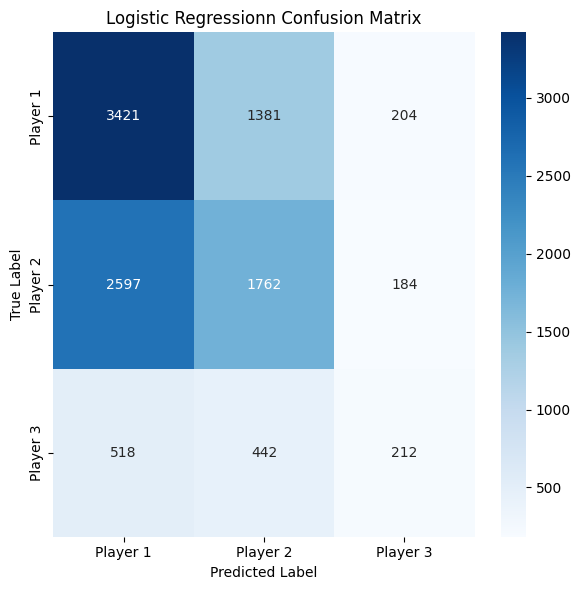

In [5]:
acc = log_reg.score(X_test_scaled, y_test)
y_pred = log_reg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Player 1', 'Player 2', 'Player 3'],
            yticklabels=['Player 1', 'Player 2', 'Player 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regressionn Confusion Matrix')
plt.tight_layout()
plt.show()